## Mean-Variance Optimization

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [141]:
ticker_description = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='descriptions')
prices = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='prices').drop('QAI',axis=1)
tot_return = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='total returns').drop('QAI',axis=1)
excess_return = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='excess returns').drop('QAI',axis=1)

ticker_description

,ticker,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
0,SPY,SPDR S&P 500,ETF,USD,NaN,NaN,NaN
1,EFA,iShares MSCI EAFE ETF,ETF,USD,NaN,NaN,NaN
2,EEM,iShares MSCI Emerging Index Fun,ETF,USD,NaN,NaN,NaN
3,PSP,Invesco Global Listed Private E,ETF,USD,NaN,NaN,NaN
4,QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,NaN,NaN,NaN
5,HYG,iShares iBoxx $ High Yield Corp,ETF,USD,NaN,NaN,NaN
6,DBC,Invesco DB Commodity Index Trac,ETF,USD,NaN,NaN,NaN
7,IYR,iShares U.S. Real Estate ETF,ETF,USD,6211444.0,3.480166e+09,The fund seeks to track the investment results...
8,IEF,iShares 7-10 Year Treasury Bond,ETF,USD,7506784.0,3.493820e+10,The underlying index measures the performance ...
9,BWX,SPDR Bloomberg International Tr,ETF,USD,NaN,NaN,NaN


In [142]:
prices.head()

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SHV,SPY,TIP
0,2011-01-31,24.350737,24.932129,33.842106,39.154465,41.369602,69.510223,36.002327,22.359201,91.488312,99.297096,75.034828
1,2011-02-28,24.511862,25.972059,33.827332,40.544365,41.963394,69.365349,37.629772,23.256830,91.496567,102.746445,75.575668
2,2011-03-31,24.718430,26.662436,35.954922,39.576050,41.981182,69.258118,37.218288,23.644442,91.512306,102.758766,76.475258
3,2011-04-30,25.924810,27.877144,36.937466,41.802536,42.651890,70.533417,38.953907,25.031689,91.562141,105.734825,78.293839
4,2011-05-31,25.573650,26.435223,35.851501,40.880329,42.708733,72.300583,39.348637,23.991255,91.552986,104.549042,78.502037


In [143]:
prices.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SHV,SPY,TIP
0,2011-01-31,24.350737,24.932129,33.842106,39.154465,41.369602,69.510223,36.002327,22.359201,91.488312,99.297096,75.034828
1,2011-02-28,24.511862,25.972059,33.827332,40.544365,41.963394,69.365349,37.629772,23.256830,91.496567,102.746445,75.575668
2,2011-03-31,24.718430,26.662436,35.954922,39.576050,41.981182,69.258118,37.218288,23.644442,91.512306,102.758766,76.475258
3,2011-04-30,25.924810,27.877144,36.937466,41.802536,42.651890,70.533417,38.953907,25.031689,91.562141,105.734825,78.293839
4,2011-05-31,25.573650,26.435223,35.851501,40.880329,42.708733,72.300583,39.348637,23.991255,91.552986,104.549042,78.502037


In [144]:
tot_return.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SHV,SPY,TIP
0,2011-02-28,0.006617,0.041710,-0.000437,0.035498,0.014353,-0.002084,0.045204,0.040146,-0.000410,0.034738,0.007208
1,2011-03-31,0.008427,0.026581,0.062896,-0.023883,0.000424,-0.001546,-0.010935,0.016667,-0.000328,0.000120,0.011903
2,2011-04-30,0.048805,0.045559,0.027327,0.056258,0.015976,0.018414,0.046633,0.058671,0.000045,0.028962,0.023780
3,2011-05-31,-0.013545,-0.051724,-0.029400,-0.022061,0.001333,0.025054,0.010133,-0.041565,-0.000600,-0.011215,0.002659
4,2011-06-30,-0.000097,-0.042645,-0.009355,-0.012108,-0.005705,-0.005043,-0.031060,-0.042581,-0.000327,-0.016869,0.007548


In [145]:
excess_return.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
0,2011-02-28,0.007027,0.042120,-0.000027,0.035908,0.014763,-0.001674,0.045614,0.040556,0.035147,0.007618
1,2011-03-31,0.008755,0.026909,0.063224,-0.023555,0.000752,-0.001218,-0.010607,0.016995,0.000448,0.012231
2,2011-04-30,0.048760,0.045514,0.027283,0.056214,0.015932,0.018369,0.046589,0.058627,0.028917,0.023735
3,2011-05-31,-0.012945,-0.051124,-0.028800,-0.021461,0.001933,0.025654,0.010733,-0.040965,-0.010615,0.003259
4,2011-06-30,0.000230,-0.042318,-0.009027,-0.011781,-0.005378,-0.004716,-0.030733,-0.042254,-0.016542,0.007876


# Summary Statistics


In [146]:
##Summary statistics
from math import sqrt


excess_return_df = excess_return.drop(columns=['Date'])
means = excess_return_df.mean() * 12
vol = excess_return_df.std() * sqrt(12)
sharpe = means/vol


In [147]:
print('Mean (annualized) returns by ETF:')
display(round(means, 4))

print('Volatility (annualized) by ETF:')
display(round(vol, 4))

print('Sharpe ratio by ETF:')
display(round(sharpe, 2))

Mean (annualized) returns by ETF:


BWX   -0.0077
DBC   -0.0053
EEM    0.0293
EFA    0.0618
HYG    0.0414
IEF    0.0164
IYR    0.0749
PSP    0.0926
SPY    0.1281
TIP    0.0205
dtype: float64

Volatility (annualized) by ETF:


BWX    0.0828
DBC    0.1666
EEM    0.1762
EFA    0.1509
HYG    0.0759
IEF    0.0634
IYR    0.1687
PSP    0.2134
SPY    0.1428
TIP    0.0511
dtype: float64

Sharpe ratio by ETF:


BWX   -0.09
DBC   -0.03
EEM    0.17
EFA    0.41
HYG    0.54
IEF    0.26
IYR    0.44
PSP    0.43
SPY    0.90
TIP    0.40
dtype: float64

## Descriptive Analysis

The code below computes the covariance and correlation matrices from each ETF’s daily excess returns in the dataset.

In [148]:
# Create excess return DataFrame without date column and check for NaN values
excess_return_1 = excess_return.copy()
print(excess_return_1.isna().sum())

Date    0
BWX     0
DBC     0
EEM     0
EFA     0
HYG     0
IEF     0
IYR     0
PSP     0
SPY     0
TIP     0
dtype: int64


,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
Date,1.714990e+34,-2.502562e+14,5.094177e+14,8.453962e+13,1.386670e+14,-1.849161e+14,-4.043419e+14,-3.384797e+14,1.463803e+13,-3.948505e+13,-2.366907e+14
BWX,-2.502562e+14,5.711688e-04,2.196043e-04,7.555636e-04,6.275912e-04,3.156385e-04,2.542502e-04,6.430128e-04,7.753191e-04,4.335958e-04,2.380913e-04
DBC,5.094177e+14,2.196043e-04,2.311646e-03,1.251052e-03,1.049150e-03,4.867512e-04,-2.643418e-04,6.567233e-04,1.342427e-03,8.567695e-04,7.733438e-05
EEM,8.453962e+13,7.555636e-04,1.251052e-03,2.586151e-03,1.816385e-03,7.704075e-04,2.487046e-05,1.446262e-03,2.349596e-03,1.442163e-03,2.842419e-04
EFA,1.386670e+14,6.275912e-04,1.049150e-03,1.816385e-03,1.897641e-03,7.516189e-04,3.401706e-05,1.483289e-03,2.402299e-03,1.519370e-03,2.537856e-04
HYG,-1.849161e+14,3.156385e-04,4.867512e-04,7.704075e-04,7.516189e-04,4.804204e-04,7.516839e-05,7.890873e-04,1.096459e-03,7.171732e-04,1.742112e-04
IEF,-4.043419e+14,2.542502e-04,-2.643418e-04,2.487046e-05,3.401706e-05,7.516839e-05,3.354040e-04,2.822681e-04,2.530885e-05,6.152957e-07,2.037860e-04
IYR,-3.384797e+14,6.430128e-04,6.567233e-04,1.446262e-03,1.483289e-03,7.890873e-04,2.822681e-04,2.370943e-03,2.248891e-03,1.515297e-03,4.301905e-04
PSP,1.463803e+13,7.753191e-04,1.342427e-03,2.349596e-03,2.402299e-03,1.096459e-03,2.530885e-05,2.248891e-03,3.793879e-03,2.264700e-03,3.708235e-04
SPY,-3.948505e+13,4.335958e-04,8.567695e-04,1.442163e-03,1.519370e-03,7.171732e-04,6.152957e-07,1.515297e-03,2.264700e-03,1.700250e-03,2.321953e-04


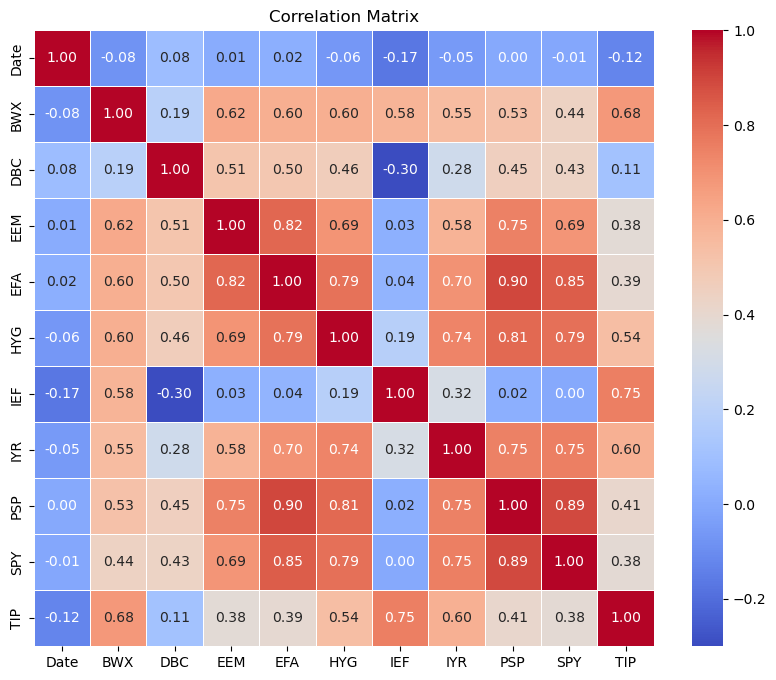

In [149]:
# Build and display covariance matrix
covariance_matrix = excess_return_1.cov()
display(covariance_matrix)

# Build correlation matrix
correlation_matrix = excess_return_1.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [150]:
# Calculate maximum and minimimum correlation coefficients across pairs
max_corr = correlation_matrix[correlation_matrix < 1].max().max()
print(f"Maximum correlation coefficient: {max_corr:.2f}")
min_corr = correlation_matrix.min().min()
print(f"Minimum correlation coefficient: {min_corr:.2f}")

Maximum correlation coefficient: 0.90
Minimum correlation coefficient: -0.30


From the correlation matrix, the highest pairwise correlation is approximately 0.90, between PSP (Invesco Global Listed Private rpuity ETF), which tracks listed private equity companies, and EFA (iShares MSCI EAFE ETF), which tracks mid- to large-cap equities in developed markets outside the U.S. and Canada. The lowest pairwise correlation is about -0.30, between IEF (iShares 7–10 Year Treasury Bond ETF), which tracks intermediate-term U.S. Treasuries, and DBC (Invesco DB Commodity Index Tracking Fund), which tracks a diversified commodities index.

Based on the summary statistics, TIPS (TIP) outperformed nominal U.S. Treasuries (IEF) in both annualized return (2.1% vs 1.6%) and risk-adjusted performance (Sharpe 0.40 vs 0.26).

### Mean-Variance

In [151]:
#exclude the date column
data = excess_return.drop(columns=['Date'])

In [152]:
excess_mean = 12*data.mean() 
ones = np.ones(excess_mean.shape[0])
covv = data.cov().to_numpy()
inv_covv = np.linalg.inv(covv)
delta_m = 1/(ones.T@inv_covv@excess_mean)
w_tan = delta_m*inv_covv@excess_mean
w_tan=w_tan.reshape(-1,1)

In [153]:
weights = {name:w_tan[i][0] for i,name in enumerate(data.columns)}
weights_tan = pd.Series(weights).sort_values(ascending=False)
weights_tan

SPY    1.059632
IEF    0.881186
HYG    0.290614
TIP    0.175293
EFA    0.068682
EEM    0.026437
DBC   -0.071623
IYR   -0.246582
PSP   -0.332995
BWX   -0.850643
dtype: float64

In [154]:
std = data.std()*np.sqrt(12)
shard_ratio = excess_mean/std
shard_ratio = shard_ratio.sort_values(ascending=False)
shard_ratio

SPY    0.897103
HYG    0.544873
IYR    0.444143
PSP    0.433804
EFA    0.409372
TIP    0.401091
IEF    0.258569
EEM    0.166542
DBC   -0.031774
BWX   -0.093202
dtype: float64

In [155]:
tik = {name:{'std':std[name] , 'mean':excess_mean[name] ,'sharpe ratio':shard_ratio[name], 'weight':weights_tan[name] }  for i,name in enumerate(data.columns)}
df = pd.DataFrame(tik).T

In [156]:
#ranking by weights
df2 = df.sort_values(by='weight', ascending=False)
df2

,std,mean,sharpe ratio,weight
SPY,0.142839,0.128141,0.897103,1.059632
IEF,0.063442,0.016404,0.258569,0.881186
HYG,0.075928,0.041371,0.544873,0.290614
TIP,0.051115,0.020502,0.401091,0.175293
EFA,0.150903,0.061775,0.409372,0.068682
EEM,0.176164,0.029339,0.166542,0.026437
DBC,0.166553,-0.005292,-0.031774,-0.071623
IYR,0.168675,0.074916,0.444143,-0.246582
PSP,0.213370,0.092561,0.433804,-0.332995
BWX,0.082789,-0.007716,-0.093202,-0.850643


In [157]:
#ranking by weights
df2 = df.sort_values(by='weight', ascending=False)
df2

,std,mean,sharpe ratio,weight
SPY,0.142839,0.128141,0.897103,1.059632
IEF,0.063442,0.016404,0.258569,0.881186
HYG,0.075928,0.041371,0.544873,0.290614
TIP,0.051115,0.020502,0.401091,0.175293
EFA,0.150903,0.061775,0.409372,0.068682
EEM,0.176164,0.029339,0.166542,0.026437
DBC,0.166553,-0.005292,-0.031774,-0.071623
IYR,0.168675,0.074916,0.444143,-0.246582
PSP,0.213370,0.092561,0.433804,-0.332995
BWX,0.082789,-0.007716,-0.093202,-0.850643


In [158]:
df3 = df.sort_values(by='sharpe ratio', ascending=False)
df3

,std,mean,sharpe ratio,weight
SPY,0.142839,0.128141,0.897103,1.059632
HYG,0.075928,0.041371,0.544873,0.290614
IYR,0.168675,0.074916,0.444143,-0.246582
PSP,0.213370,0.092561,0.433804,-0.332995
EFA,0.150903,0.061775,0.409372,0.068682
TIP,0.051115,0.020502,0.401091,0.175293
IEF,0.063442,0.016404,0.258569,0.881186
EEM,0.176164,0.029339,0.166542,0.026437
DBC,0.166553,-0.005292,-0.031774,-0.071623
BWX,0.082789,-0.007716,-0.093202,-0.850643


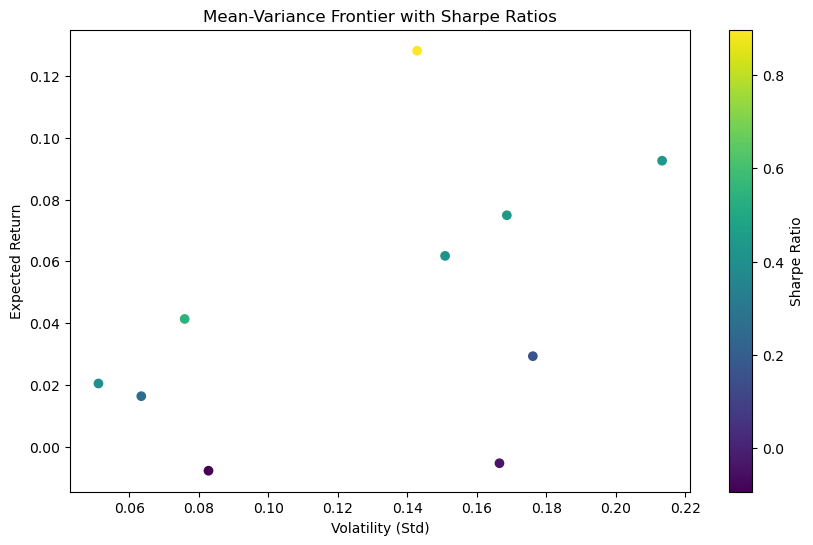

In [207]:
plt.figure(figsize=(10,6))
plt.scatter(std, df['mean'], c=df['sharpe ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Std)')
plt.ylabel('Expected Return')
plt.title('Mean-Variance Frontier with Sharpe Ratios')
plt.show()


(0.0, 1.0765231515473748)

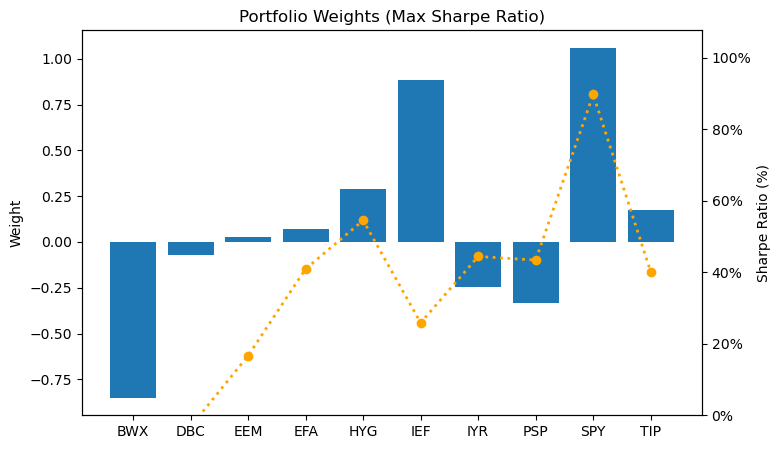

In [ ]:
import matplotlib.ticker as mtick

max_sharpe_idx = np.argmax(df['sharpe ratio'])
max_sharpe_weights = df['weight']


fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(df.index, max_sharpe_weights)
ax1.set_ylabel('Weight')
ax1.set_title('Portfolio Weights')


ax2 = ax1.twinx()
ax2.set_ylabel('Sharpe Ratio (%)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

# Scatter plot for stock Sharpe ratios
ax2.plot(df.index, df['sharpe ratio'], color='orange', marker='o', linestyle=':', linewidth=2, label='Stock Sharpe')

# Optional: adjust secondary axis range nicely
ax2.set_ylim(0, max(df['sharpe ratio'].max()*1.2, 0.5))


From the table and the plots we can see there is no obvious correlation between weights and the sharpe ratio. As just because it has a a high weight does not mean that it coresponds to a high sharpe ratio. If you take as an example  IEF it had the second largest weight but did not have the second largest sharpe.

In [256]:
# Compute the mean, volatility, and Sharpe ratio for the tangency portfolio
mean_tan = w_tan.T@excess_mean.to_numpy()
vol_tan = np.sqrt((w_tan.T@covv@w_tan)[0,0])*np.sqrt(12)
sharpe_ration = mean_tan[0]/vol_tan
print(f'Mean: {mean_tan[0]:.4f}\nVolatility: {vol_tan:.4f}\nSharpe Ratio: {sharpe_ration:.4f}')


Mean: 0.1285
Volatility: 0.0875
Sharpe Ratio: 1.4692


These are the following metrics for the tangency portfolio for $w^{tan}$

## TIPS

### Tangency portfolio weights and performance without TIPS

In [160]:
# Drop TIPS column from the data
data_no_tips = data.drop(columns=['TIP'])

# Compute mean of the data without TIPS
excess_mean_no_tips = 12*data_no_tips.mean()

# Compute weights for the tangency portfolio without TIPS
ones = np.ones(excess_mean_no_tips.shape[0])
covv_no_tips = data_no_tips.cov().to_numpy()
inv_covv_no_tips = np.linalg.inv(covv_no_tips)
delta_m_no_tips = 1/(ones.T@inv_covv_no_tips@excess_mean_no_tips)
w_tan_no_tips = delta_m_no_tips*inv_covv_no_tips@excess_mean_no_tips
w_tan_no_tips=w_tan_no_tips.reshape(-1,1)

#Display the weights
weights_no_tips = {name:w_tan_no_tips[i][0] for i,name in enumerate(data_no_tips.columns)}
weights_tan_no_tips = pd.Series(weights_no_tips).sort_values(ascending=False)
weights_tan_no_tips


SPY    1.100973
IEF    1.019957
HYG    0.316300
EFA    0.060153
EEM    0.032493
DBC   -0.063742
IYR   -0.247445
PSP   -0.339398
BWX   -0.879292
dtype: float64

In [161]:
# Compute performance metrics for the tangency portfolio without TIPS
mean_tan_no_tips = w_tan_no_tips.T@excess_mean_no_tips.to_numpy()
vol_tan_no_tips = np.sqrt((w_tan_no_tips.T@covv_no_tips@w_tan_no_tips)[0,0])*np.sqrt(12)
sharpe_ratio_no_tips = mean_tan_no_tips[0]/vol_tan_no_tips
print(f'Mean: {mean_tan_no_tips[0]:.4f}\nVolatility: {vol_tan_no_tips:.4f}\nSharpe Ratio: {sharpe_ratio_no_tips:.4f}')

Mean: 0.1327
Volatility: 0.0905
Sharpe Ratio: 1.4675


### Tangency portfolio weights and performance with higher expected return for TIPS

In [162]:
# Adjust TIP expected excess mean by +0.0012 (annualized)
excess_mean_tipadj = 12 * data.mean().copy()
excess_mean_tipadj.loc['TIP'] = excess_mean_tipadj['TIP'] + (0.0012 * 12)

# Compute tangency portfolio with adjusted expected excess returns for TIPS
mu_tipadj = excess_mean_tipadj.to_numpy()
ones_tipadj = np.ones(mu_tipadj.shape[0])
cov_tipadj = data.cov().to_numpy()
inv_cov_tipadj = np.linalg.inv(cov_tipadj)

delta_tipadj = 1.0 / (ones_tipadj @ inv_cov_tipadj @ mu_tipadj)
w_tan_tipadj = (delta_tipadj * (inv_cov_tipadj @ mu_tipadj)).reshape(-1, 1)

weights_tipadj = {name: w_tan_tipadj[i][0] for i, name in enumerate(data.columns)}
weights_tan_tipadj = pd.Series(weights_tipadj).sort_values(ascending=False)
weights_tan_tipadj

TIP    1.282487
SPY    0.798513
HYG    0.128372
EFA    0.122554
IEF    0.004667
EEM   -0.011815
DBC   -0.121397
IYR   -0.241132
PSP   -0.292555
BWX   -0.669693
dtype: float64

In [163]:
# Compute performance metrics for the tangency portfolio with adjusted expected returns for TIPS
mean_tan_tipadj = w_tan_tipadj.T@excess_mean_tipadj.to_numpy()
vol_tan_tipadj = np.sqrt((w_tan_tipadj.T@cov_tipadj@w_tan_tipadj)[0,0])*np.sqrt(12)
sharpe_ratio_tipadj = mean_tan_tipadj[0]/vol_tan_tipadj
print(f'Mean: {mean_tan_tipadj[0]:.4f}\nVolatility: {vol_tan_tipadj:.4f}\nSharpe Ratio: {sharpe_ratio_tipadj:.4f}')

Mean: 0.1204
Volatility: 0.0746
Sharpe Ratio: 1.6124


### Summary

If TIPS are excluded from the investment universe, the Sharpe ratio of the tangency portfolio declines only marginally from 1.4692 to 1.4675. This indicates that including TIPS provides only very modest improvement to the risk-adjusted performance of the portfolio. The decrease in the Sharpe ratio when removing TIPS is primarily driven by an increase in portfolio volatility, even though the tangency portfolio without TIPS delivers a higher mean annualized return (13.27% versus 12.85%).

When the expected monthly return of TIPS is increased by 0.0012, the allocation to TIPS in the tangency portfolio rises (from 0.18 to 1.28). Interestingly, while this adjustment lowers the expected annualized portfolio return to 12.04%, it also reduces annualized volatility from 8.75% to 7.46%. As a result, the Sharpe ratio improves noticeably to 1.61.

Taken together, these results suggest that TIPS do expand the investment opportunity set. Although their inclusion does not significantly increase the in-sample Sharpe ratio at their actual excess returns, they allow the portfolio to achieve lower volatility, thus enhancing the set of attainable risk-return combinations. For this reason, Harvard should view TIPS as a distinct and valuable asset class within its investment universe.

## Allocations

### Equally-Weighted

In [164]:
#Rescale the entire weighting vector to have target mean
X = excess_return.copy()
if not isinstance(X.index, (pd.DatetimeIndex, pd.PeriodIndex)):
   X = X.set_index(X.columns[0])
X.index = pd.to_datetime(X.index)
X = X.apply(pd.to_numeric, errors = 'coerce').dropna()
#Monthly:
mu_m = X.mean()
sigma_m = X.cov()


target_mu = 0.01
def rescale(w, mu, target):
   mu_p = float(w @ mu)
   return w * (target / mu_p)
n = X.shape[1]
w_eq = np.ones(n)/n
w_eq = rescale(w_eq, mu_m, target_mu)
print(w_eq)

[0.26548628 0.26548628 0.26548628 0.26548628 0.26548628 0.26548628
 0.26548628 0.26548628 0.26548628 0.26548628]


### Risk-Parity

In [165]:
inv_var = 1/np.diag(sigma_m)
w_rp = inv_var / inv_var.sum()
w_rp = rescale(w_rp, mu_m, target_mu)
print(w_rp)

[0.54058467 0.1335694  0.11939177 0.16271001 0.64269776 0.92057663
 0.13022879 0.08138508 0.18159982 1.4181035 ]


### Mean Variance

In [166]:
theta = np.linalg.solve(sigma_m.values, mu_m.values)        
w_mv_base = pd.Series(theta / np.sum(theta), index=X.columns)   
w_mv = rescale(w_mv_base, mu_m, target_mu)            
display(w_mv)

BWX   -0.794248
DBC   -0.066874
EEM    0.024684
EFA    0.064129
HYG    0.271347
IEF    0.822766
IYR   -0.230235
PSP   -0.310919
SPY    0.989382
TIP    0.163671
dtype: float64

### Comparisons

In [167]:
port = {"EW": pd.Series(w_eq, index = X.columns), 
        "RP": pd.Series(w_rp, index = X.columns), 
        "MV": pd.Series(w_mv, index = X.columns)}

In [168]:
retn_series = {name: X.dot(w) for name, w in port.items()}
retn_df = pd.DataFrame(retn_series)

In [169]:
ann_mean = retn_df.mean() * 12.0
ann_vol  = retn_df.std(ddof=1) * np.sqrt(12.0)
ann_sharpe = (retn_df.mean() / retn_df.std(ddof=1)) * np.sqrt(12.0)

In [170]:
results_df = pd.DataFrame({
    "Ann. Mean":   ann_mean,
    "Ann. Vol":    ann_vol,
    "Ann. Sharpe": ann_sharpe
}).sort_values("Ann. Sharpe", ascending=False)

In [171]:
display(results_df)

,Ann. Mean,Ann. Vol,Ann. Sharpe
MV,0.12,0.081678,1.469190
RP,0.12,0.263919,0.454685
EW,0.12,0.269247,0.445687


The Mean-Variance tangency portfolio has a sharpe ratio of 1.47 which is. much higher than the rpual-weighted or risk-parity. 
this indicates the tangency portfolio delivers much better risk-adjusted returns (as expected since it explicitly maximizes sharpe)

Annualized volatility is only 8.17% which is far below RP and EW, while delivering the same target mean. 

In terms of comparing RP and EW, both achieve the same mean but RP's volatility is slightly lower which gives a slightly better Sharpe. This makes sense as RP allocates more to low-vol assets like IEF and TIP, which reduces risk relative to EW.

However, both are far less efficient than MV


In [172]:
weights_df = pd.concat(port, axis=1)
display(weights_df)

,EW,RP,MV
BWX,0.265486,0.540585,-0.794248
DBC,0.265486,0.133569,-0.066874
EEM,0.265486,0.119392,0.024684
EFA,0.265486,0.162710,0.064129
HYG,0.265486,0.642698,0.271347
IEF,0.265486,0.920577,0.822766
IYR,0.265486,0.130229,-0.230235
PSP,0.265486,0.081385,-0.310919
SPY,0.265486,0.181600,0.989382
TIP,0.265486,1.418104,0.163671


For EW, it is uniform with about 26.5% to each asset. RP has big weights in low variance bonds such as IEF, and TIP and smaller allocations to higher-volatility equities and commodities. MV very concentrated and heavy positive weights in IEF and SPY, but it has large negative weights or short positions in BWX, PSP, IYR, and DBC. 

This reflects MV"s attempt to maximize sharpe which overweights assets with high mean-to-volatility and strong diversification benefits, shorting assets with low sharpe or poor correlation propertires. 

In all, EW ignores risk/return differences and is inefficient. And while RP tilts towards bonds and has lower volatility, it is still inefficient. MV makes aggressive bets, including shorts, which explains the dramatically higher sharpe ratio.

## 4. Out of Sample

In [189]:
X_train = excess_return[excess_return['Date']<='2023-12-31'].drop('Date',axis=1)
X_test = excess_return[excess_return['Date']>'2023-12-31'].drop('Date',axis=1)

n = X_train.shape[1]
mu_train = X_train.mean().to_numpy()  # mean excess return per asset
cov_train = X_train.cov().to_numpy()
mu_test = X_test.mean().to_numpy()
cov_test = X_test.cov().to_numpy()

mu_p = 0.01

### Equally Weighted 

In [190]:
#Equally Weighted
mu_p = 0.01
w_eq = 1/n * np.ones(n)
mu_eq_train_raw = w_eq@mu_train
w_eq_scaled= mu_p/mu_eq_train_raw * w_eq
w_eq_scaled

array([0.25882838, 0.25882838, 0.25882838, 0.25882838, 0.25882838,
       0.25882838, 0.25882838, 0.25882838, 0.25882838, 0.25882838])

In [191]:
#Find the standar deviation in sample
mu_eq_train = w_eq_scaled @ mu_train
std_eq_train = np.sqrt(w_eq_scaled.T@cov_train @ w_eq_scaled)

### Risk Parity Weights

In [192]:
#Risk Parity
var_train = np.diag(cov_train)
w_rp_raw = 1/var_train
w_rp_raw = w_rp_raw/w_rp_raw.sum()
mu_rp_train_raw = w_rp_raw@mu_train

#Scale weights
w_rp_scaled = mu_p/mu_rp_train_raw * w_rp_raw
w_rp_scaled

array([0.54222768, 0.12081133, 0.10711909, 0.14937501, 0.57472572,
       0.89757822, 0.12433866, 0.07455437, 0.16970527, 1.33245365])

In [193]:
#Find the standar deviation in sample
mu_rp_train = w_rp_scaled @ mu_train
std_rp_train = np.sqrt(w_rp_scaled.T@cov_train @ w_rp_scaled)

### Mean Variance with tangential weights

In [ ]:
#Mean variance
inv_covv = np.linalg.inv(cov_train)
delta = 1/(np.ones(n).T@inv_covv@mu_train)
w_mv_raw = delta*inv_covv@mu_train

#rescale to hit target mean
mu_mv_train_raw = w_mv_raw @ mu_train
w_mv_scaled = w_mv_raw * (mu_p / mu_mv_train_raw)
w_mv_scaled

array([-8.23782352e-01,  3.54007090e-03,  4.18055454e-02, -1.12152119e-01,
        2.02509840e-01,  1.01395855e+00, -2.13733512e-01, -2.25556571e-01,
        1.01641315e+00, -6.46439528e-04])

In [195]:
#Find the standar deviation in sample
mu_mv_train = w_mv_scaled @ mu_train
std_mv_train = np.sqrt(w_mv_scaled.T@cov_train @ w_mv_scaled)
std_mv_train

np.float64(0.022823957444302094)

In [196]:
sharpe_eq = mu_eq_train/std_eq_train *np.sqrt(12)
sharpe_rp = mu_rp_train/std_rp_train*np.sqrt(12)
sharpe_mv = mu_mv_train/std_mv_train *np.sqrt(12)

In [197]:
#Sharpe ratio using in sample
print('In Sample sharpe ratio')
print(f'Sharpe Ratio for EQ = {sharpe_eq}')
print(f'Sharpe Ratio Risk Parity = {sharpe_rp}')
print(f'Sharpe Ratio for Mean Variance {sharpe_mv}')

In Sample sharpe ratio
Sharpe Ratio for EQ = 0.4428274452403739
Sharpe Ratio Risk Parity = 0.47650890677194896
Sharpe Ratio for Mean Variance 1.5177480170085722


In [198]:
#Calculate using out of sample for EQ
mu_eq_test = w_eq_scaled @ mu_test
std_eq_test = np.sqrt(w_eq_scaled.T@cov_test @ w_eq_scaled)
std_eq_test

np.float64(0.04961417085505313)

In [199]:
#Calculate using out of sample for RP
mu_rp_test = w_rp_scaled @ mu_test
std_rp_test = np.sqrt(w_mv_scaled.T@cov_test @ w_mv_scaled)
std_rp_test

np.float64(0.031258575365158504)

In [200]:
#Calculate using out of. sample
mu_mv_test = w_mv_scaled @ mu_test
std_mv_test = np.sqrt(w_mv_scaled.T@cov_test @ w_mv_scaled)
std_mv_test

np.float64(0.031258575365158504)

In [201]:
sharpe_eq_test = mu_eq_test/std_eq_test *np.sqrt(12)
sharpe_rp_test = mu_rp_test/std_rp_test*np.sqrt(12)
sharpe_mv_test = mu_mv_test/std_mv_test *np.sqrt(12)

In [202]:
#Sharpe ratio using Out of sample
print('Out of Sample sharpe ratio')
print(f'Sharpe Ratio for EQ = {sharpe_eq_test:.2f}')
print(f'Sharpe Ratio Risk Parity = {sharpe_rp_test:.2f}')
print(f'Sharpe Ratio for Mean Variance {sharpe_mv_test:.2f}')

Out of Sample sharpe ratio
Sharpe Ratio for EQ = 0.52
Sharpe Ratio Risk Parity = 0.30
Sharpe Ratio for Mean Variance 1.01


In [ ]:
strat = {'Equal Weight':{'In Sample Sharpe':sharpe_eq, 'In Sample Mean':mu_eq_train*12, 'Out Sample Sharpe':sharpe_eq_test, 'Out Sample Mean':mu_eq_test*12}, 
         'Risk Parity':{'In Sample Sharpe':sharpe_rp, 'In Sample Mean':mu_rp_train*12, 'Out Sample Sharpe':sharpe_rp_test, 'Out Sample Mean':mu_rp_test*12}, 
         'Mean Variance':{'In Sample Sharpe':sharpe_mv, 'In Sample Mean':mu_mv_train*12, 'Out Sample Sharpe':sharpe_mv_test, 'Out Sample Mean':mu_mv_test*12}}
pd.DataFrame(strat).T

,In Sample Sharpe,In Sample Mean,Out Sample Sharpe,Out Sample Mean
Equal Weight,44.282745,12.0,52.105060,8.955220
Risk Parity,47.650891,12.0,29.791823,3.225944
Mean Variance,151.774802,12.0,101.370009,10.976637


From this result we can see that the Mean Variance perform the best in sample and out sample compared to the other strategies.

# 6  Bayesian Allocation

In [249]:
X = excess_return.copy().drop('Date', axis=1)
cov = X.cov()
mu = X.mean()
diag_cov = np.diag(np.diag(cov))
reg_cov = (cov+diag_cov)/2

In [250]:
#Mean variance
inv_covv = np.linalg.inv(reg_cov)
delta = 1/(np.ones(n).T@inv_covv@mu_train)
w_bayesian_raw = delta*inv_covv@mu_train

#rescale to hit target mean
mu_bayesian_raw = w_bayesian_raw @ mu
w_bayesian_scaled = w_bayesian_raw * (mu_p / mu_bayesian_raw)
w_bayesian_scaled

array([-0.60180814, -0.10588984, -0.09785779,  0.03408091,  0.37984615,
        0.46260156,  0.06018329,  0.02841632,  0.58535228,  0.49321173])

In [254]:
mu_bayesian_scaled = w_bayesian_scaled @ mu
std_bayesian = np.sqrt(w_bayesian_scaled.T@reg_cov@w_bayesian_scaled)
sharpe_bayesian = mu_bayesian_scaled/std_bayesian *np.sqrt(12)
print(f'Sharpe Ratio for  Bayesian Allocation = {sharpe_bayesian}')

Sharpe Ratio for  Bayesian Allocation = 1.0949659712489839


As we can see from the sharpe ratio this strategy performs better than Risk parity and Equally weighted, however the Mean Variance tangential weights still is the best and outperforms the Bayesian Allocation method.